<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-problem" data-toc-modified-id="The-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The problem</a></span></li><li><span><a href="#Data-exporation" data-toc-modified-id="Data-exporation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data exporation</a></span></li><li><span><a href="#The-linear-model" data-toc-modified-id="The-linear-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The linear model</a></span></li><li><span><a href="#The-optimal-linear-model" data-toc-modified-id="The-optimal-linear-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The optimal linear model</a></span></li></ul></div>

# Linear regression motivation

In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

## The problem

In [5]:
data = pd.read_csv("../datasets/hours_vs_mark.csv", index_col=0)

We have 100 students, and we know:
 * how many hours they studied for their exam
 * what mark they got (0 to 100)

In [3]:
data.head()

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


In [4]:
data.sample(5)

,hours,mark
19,831,100
79,698,83
14,908,86
95,252,66
36,421,48


We would like to understand the relationship $$mark = f(hours)$$

So that we can **predict the expected mark** we will get by studying a given number of hours

## Data exporation

In [5]:
data.describe()

,hours,mark
count,100.000000,100.000000
mean,428.540000,47.940000
std,285.241752,27.757907
min,2.000000,0.000000
25%,167.250000,29.500000
50%,424.500000,44.000000
75%,662.500000,68.000000
max,986.000000,100.000000


<AxesSubplot:xlabel='hours', ylabel='Count'>

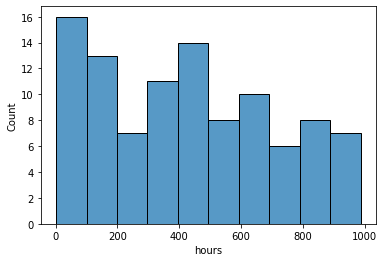

In [6]:
sns.histplot(data.hours, bins=10)

<AxesSubplot:xlabel='hours', ylabel='mark'>

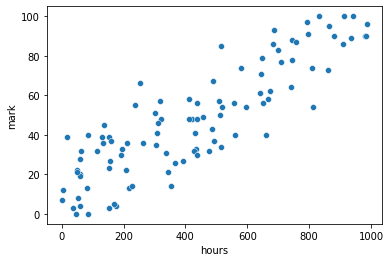

In [7]:
sns.scatterplot(x=data["hours"], y=data["mark"])

In [29]:
x = np.linspace(-1, 1, 101)

The more you study, (on average) the better you do on the exam

## The linear model

Lets try a linear regression $$Y = m * X + n$$

$m$ is the slope  
$n$ is the value of $Y$ when $X=0$ 

$$mark = m * hours + n$$

We want to find $m$ and $n$ that *best* model our data

Lets guess:

$$mark = 0.1 * hours$$

$$mark_2 = 0.12 * horas + 10$$

Which model performs better?

In [11]:
data.head()

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


In [12]:
data["prediction_1"] = 0.1 * data.hours

In [13]:
data["prediction_2"] = 0.12 * data.hours + 10

In [14]:
data.head(10)

,hours,mark,prediction_1,prediction_2
0,865,95,86.5,113.80
1,4,12,0.4,10.48
2,305,35,30.5,46.60
3,437,56,43.7,62.44
4,682,86,68.2,91.84
5,560,40,56.0,77.20
6,367,26,36.7,54.04
7,861,73,86.1,113.32
8,59,20,5.9,17.08
9,514,85,51.4,71.68


Lets measure error of both models

In [15]:
data['error_1'] = (data.mark - data.prediction_1).abs()

In [16]:
data['error_2'] = (data.mark - data.prediction_2).abs()

In [17]:
data.head(10)

,hours,mark,prediction_1,prediction_2,error_1,error_2
0,865,95,86.5,113.80,8.5,18.80
1,4,12,0.4,10.48,11.6,1.52
2,305,35,30.5,46.60,4.5,11.60
3,437,56,43.7,62.44,12.3,6.44
4,682,86,68.2,91.84,17.8,5.84
5,560,40,56.0,77.20,16.0,37.20
6,367,26,36.7,54.04,10.7,28.04
7,861,73,86.1,113.32,13.1,40.32
8,59,20,5.9,17.08,14.1,2.92
9,514,85,51.4,71.68,33.6,13.32


In [19]:
data.error_1.mean()

12.675999999999998

In [20]:
data.error_2.mean()

18.073599999999995

So model 1 performs better!

Lets plot our models

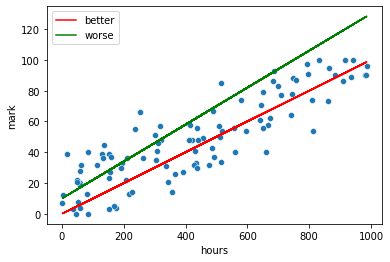

In [23]:
fig, ax = plt.subplots()
sns.scatterplot(x=data["hours"], y=data["mark"])

plt.plot(data.hours, data.prediction_1, color='r', label='better')
plt.plot(data.hours, data.prediction_2, color='g', label='worse')

plt.legend()

$$mark = m * hours + n$$

$$\text{model_error} = L(m, n)$$

$$L(0.1, 0) = 12.7$$

$$L(0.12, 10) = 18.7$$

## The optimal linear model

Can we find the **best**?

`scikit-learn` is a Python library for building ML models

Linear regression is now called a ML algorithm (years ago it was only basic statistical inference... you know, the hype)

`!pip install scikit-learn`

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [26]:
data.head()

,hours,mark,prediction_1,prediction_2,error_1,error_2
0,865,95,86.5,113.80,8.5,18.80
1,4,12,0.4,10.48,11.6,1.52
2,305,35,30.5,46.60,4.5,11.60
3,437,56,43.7,62.44,12.3,6.44
4,682,86,68.2,91.84,17.8,5.84


In [29]:
lr.fit(
    # X = data[["hours", "age", "n_bedrooms"]],
    X = data[["hours"]],
    y = data.mark
)

LinearRegression()

$$mark = m * hours + n$$

In [31]:
lr.coef_

array([0.08437787])

In [32]:
optimal_m = lr.coef_[0]

In [33]:
optimal_m

0.08437787096170372

In [34]:
optimal_n = lr.intercept_

In [35]:
optimal_n

11.78070717807148

$$mark = 0.084 * hours + 11.78$$

In [37]:
data.head()

,hours,mark,prediction_1,prediction_2,error_1,error_2
0,865,95,86.5,113.80,8.5,18.80
1,4,12,0.4,10.48,11.6,1.52
2,305,35,30.5,46.60,4.5,11.60
3,437,56,43.7,62.44,12.3,6.44
4,682,86,68.2,91.84,17.8,5.84


In [38]:
data["best_prediction"] = data.hours * optimal_m + optimal_n

In [39]:
data["best_prediction_error"] = (data.best_prediction - data.mark).abs()

In [41]:
data.head()

,hours,mark,prediction_1,prediction_2,error_1,error_2,best_prediction,best_prediction_error
0,865,95,86.5,113.80,8.5,18.80,84.767566,10.232434
1,4,12,0.4,10.48,11.6,1.52,12.118219,0.118219
2,305,35,30.5,46.60,4.5,11.60,37.515958,2.515958
3,437,56,43.7,62.44,12.3,6.44,48.653837,7.346163
4,682,86,68.2,91.84,17.8,5.84,69.326415,16.673585


In [42]:
data.best_prediction_error.mean()

11.402698299019335

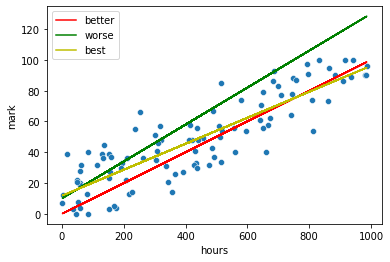

In [44]:
fig, ax = plt.subplots()
sns.scatterplot(x=data["hours"], y=data["mark"])

plt.plot(data.hours, data.prediction_1, color='r', label='better')
plt.plot(data.hours, data.prediction_2, color='g', label='worse')
plt.plot(data.hours, data.best_prediction, color='y', label='best')

plt.legend()